In [112]:
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2024, 1, 13, 17, 12, 24, 613339)

In [5]:
now.year,now.month,now.day

(2024, 1, 13)

In [6]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011,1,7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [20]:
from datetime import tzinfo
from datetime import datetime, timedelta

In [39]:
class UTC(tzinfo):
    # Subclasses must override the name(), utcoffset() and dst() methods.
    def __init__(self,offset=0) -> None:
        # super().__init__()
        self.offset = offset

    def dst(self,dt=0) -> timedelta | None:
        # return super().dst(__dt)
        return timedelta(hours = self.offset)
    
    def tzname(self):
        return "UCT+08"
    
    def utcoffset(self,dt=0) -> timedelta | None:
        # return super().utcoffset(__dt)
        return timedelta(hours=self.offset)


In [40]:
datetime(year=2024,month=1,day=13,tzinfo=UTC(8))

datetime.datetime(2024, 1, 13, 0, 0, tzinfo=<__main__.UTC object at 0x0000025875FF3F50>)

In [41]:
UTC().tzname()

'UCT+08'

In [50]:
class NEW():
    def __init__(self,name='None',time=0) -> None:
        self.name = name
        self.time = timedelta(seconds=time)

    def __str__(self):
        return self.name
    
    # def name(self):
        # return self.name()
    

In [51]:
print(NEW('A'))

A


In [52]:
stamp = datetime(2011,1,3)

In [53]:
str(stamp)

'2011-01-03 00:00:00'

In [55]:
stamp.strftime(r'%Y-%m-%d')

'2011-01-03'

In [58]:
value = '2011-01-03'

In [59]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [60]:
datestrs = ['7/6/2011','8/6/2011']

In [61]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [62]:
from dateutil.parser import parse

In [63]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [64]:
parse('Jan 31,1997 10:45 PM')

datetime.datetime(2024, 1, 31, 22, 45)

In [65]:
parse('6/12/2001')

datetime.datetime(2001, 6, 12, 0, 0)

In [67]:
parse('6/12/2001',dayfirst=True)

datetime.datetime(2001, 12, 6, 0, 0)

In [68]:
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']

In [110]:
pd.to_datetime('04/18/12',format='%m/%d/%y',)

Timestamp('2012-04-18 00:00:00')

In [70]:
idx = pd.to_datetime(datestrs+[None])

In [71]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [72]:
idx[2]

NaT

In [73]:
pd.isnull(idx)

array([False, False,  True])

In [111]:
dates = [datetime(2011,1,2),datetime(2011,1,5),
         datetime(2011,1,7),datetime(2011,1,8),
         datetime(2011,1,10),datetime(2011,1,12)]

In [113]:
ts = pd.Series(np.random.randn(6),index=dates)

In [114]:
ts

2011-01-02   -0.980189
2011-01-05   -1.461870
2011-01-07   -0.049466
2011-01-08   -0.097636
2011-01-10   -1.198243
2011-01-12    0.456060
dtype: float64

In [115]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [116]:
ts+ts[::2]

2011-01-02   -1.960378
2011-01-05         NaN
2011-01-07   -0.098932
2011-01-08         NaN
2011-01-10   -2.396486
2011-01-12         NaN
dtype: float64

In [117]:
ts.index.dtype

dtype('<M8[ns]')

In [118]:
stamp = ts.index[0]

In [119]:
stamp

Timestamp('2011-01-02 00:00:00')

In [120]:
stamp = ts.index[2]

In [121]:
ts[stamp]

-0.04946587826937192

In [122]:
ts['1/10/2011']

-1.1982431839581844

In [123]:
ts['20110110']

-1.1982431839581844

In [124]:
loger_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000',periods=1000))

In [125]:
loger_ts

2000-01-01   -0.054777
2000-01-02   -2.145355
2000-01-03    0.534352
2000-01-04   -0.298574
2000-01-05   -0.238289
                ...   
2002-09-22    0.198735
2002-09-23   -0.149084
2002-09-24    1.165795
2002-09-25   -0.848446
2002-09-26   -0.981100
Freq: D, Length: 1000, dtype: float64

In [127]:
loger_ts['2001']

2001-01-01    0.404239
2001-01-02   -0.722705
2001-01-03    0.900575
2001-01-04    0.595043
2001-01-05   -0.487956
                ...   
2001-12-27   -0.201487
2001-12-28    0.139537
2001-12-29    0.819060
2001-12-30    0.095005
2001-12-31   -1.627833
Freq: D, Length: 365, dtype: float64

In [128]:
ts[datetime(2011,1,7):]

2011-01-07   -0.049466
2011-01-08   -0.097636
2011-01-10   -1.198243
2011-01-12    0.456060
dtype: float64

In [130]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.049466
2011-01-08   -0.097636
2011-01-10   -1.198243
dtype: float64

In [132]:
ts.truncate(after='1/9/2011',before='2011-01-01',)

2011-01-02   -0.980189
2011-01-05   -1.461870
2011-01-07   -0.049466
2011-01-08   -0.097636
dtype: float64

In [133]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')

In [135]:
long_df = pd.DataFrame(np.random.randn(100,4),
                       index=dates,
                       columns=['Colorado','Texas','New York','Ohio'])

In [138]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.862532,-0.551542,-0.273934,1.752173
2001-05-09,-0.347134,-1.097260,1.119908,-0.960338
2001-05-16,-0.263216,0.624162,-0.231930,0.624584
2001-05-23,0.964001,0.375547,-0.310084,-0.398516
2001-05-30,0.769376,-0.556520,-1.442214,0.222130


In [139]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000',
                          '1/2/2000','1/3/2000'])

In [140]:
dup_ts = pd.Series(np.arange(5),index=dates)

In [141]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [143]:
dup_ts.is_unique

True

In [144]:
dup_ts.index.is_unique

False

In [145]:
dup_ts['1/3/2000']

4

In [146]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [149]:
My_Series = pd.Series(np.random.randn(5),
                      index=['a','a','a','b','d'],)

In [151]:
My_Series['a']

a    0.018842
a    0.738575
a   -0.316343
dtype: float64

In [152]:
grouped = dup_ts.groupby(level=0)

In [153]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [154]:
grouped = dup_ts.groupby(dup_ts.index)

In [155]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [156]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [157]:
ts

2011-01-02   -0.980189
2011-01-05   -1.461870
2011-01-07   -0.049466
2011-01-08   -0.097636
2011-01-10   -1.198243
2011-01-12    0.456060
dtype: float64

In [158]:
resampler = ts.resample('D')

In [159]:
resampler

In [162]:
pd.date_range('2024-1-13',periods=100,freq='H')

DatetimeIndex(['2024-01-13 00:00:00', '2024-01-13 01:00:00',
               '2024-01-13 02:00:00', '2024-01-13 03:00:00',
               '2024-01-13 04:00:00', '2024-01-13 05:00:00',
               '2024-01-13 06:00:00', '2024-01-13 07:00:00',
               '2024-01-13 08:00:00', '2024-01-13 09:00:00',
               '2024-01-13 10:00:00', '2024-01-13 11:00:00',
               '2024-01-13 12:00:00', '2024-01-13 13:00:00',
               '2024-01-13 14:00:00', '2024-01-13 15:00:00',
               '2024-01-13 16:00:00', '2024-01-13 17:00:00',
               '2024-01-13 18:00:00', '2024-01-13 19:00:00',
               '2024-01-13 20:00:00', '2024-01-13 21:00:00',
               '2024-01-13 22:00:00', '2024-01-13 23:00:00',
               '2024-01-14 00:00:00', '2024-01-14 01:00:00',
               '2024-01-14 02:00:00', '2024-01-14 03:00:00',
               '2024-01-14 04:00:00', '2024-01-14 05:00:00',
               '2024-01-14 06:00:00', '2024-01-14 07:00:00',
               '2024-01-

In [164]:
index = pd.date_range('2012-2-1','2012-6-1')

In [165]:
index

DatetimeIndex(['2012-02-01', '2012-02-02', '2012-02-03', '2012-02-04',
               '2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10',
               ...
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
               '2012-05-27', '2012-05-28', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', length=122, freq='D')

In [166]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [167]:
pd.date_range(end='2012-6-1',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [169]:
pd.date_range('2000-01-01','2000-12-01',freq='BM',)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [175]:
pd.date_range('2024-1-13',freq='A-FEB',periods=10)

DatetimeIndex(['2024-02-29', '2025-02-28', '2026-02-28', '2027-02-28',
               '2028-02-29', '2029-02-28', '2030-02-28', '2031-02-28',
               '2032-02-29', '2033-02-28'],
              dtype='datetime64[ns]', freq='A-FEB')

In [176]:
pd.date_range('2012-05-02 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [177]:
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [178]:
from pandas.tseries.offsets import Hour,Minute

In [179]:
hour = Hour()

In [180]:
hour

<Hour>

In [181]:
four_hours = Hour(4)

In [182]:
four_hours

<4 * Hours>

In [183]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [184]:
pd.date_range('2000-01-01','2000-01-03 23:59',freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [185]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [194]:
pd.date_range('2000-01-01',periods=10,freq='2Q-JAN')

DatetimeIndex(['2000-01-31', '2000-07-31', '2001-01-31', '2001-07-31',
               '2002-01-31', '2002-07-31', '2003-01-31', '2003-07-31',
               '2004-01-31', '2004-07-31'],
              dtype='datetime64[ns]', freq='2Q-JAN')

In [190]:
rng = pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')

In [191]:
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [192]:
list(rng)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

In [195]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000',periods=4,freq='M'))

In [196]:
ts

2000-01-31    0.825401
2000-02-29    2.423354
2000-03-31   -0.936341
2000-04-30    0.613711
Freq: M, dtype: float64

In [200]:
ts.shift(1)

2000-01-31         NaN
2000-02-29    0.825401
2000-03-31    2.423354
2000-04-30   -0.936341
Freq: M, dtype: float64

In [199]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29    1.935972
2000-03-31   -1.386382
2000-04-30   -1.655435
Freq: M, dtype: float64

In [201]:
ts.pct_change()

2000-01-31         NaN
2000-02-29    1.935972
2000-03-31   -1.386382
2000-04-30   -1.655435
Freq: M, dtype: float64

In [202]:
ts.shift(2,freq='M')

2000-03-31    0.825401
2000-04-30    2.423354
2000-05-31   -0.936341
2000-06-30    0.613711
Freq: M, dtype: float64

In [203]:
ts.shift(3,freq='D')

2000-02-03    0.825401
2000-03-03    2.423354
2000-04-03   -0.936341
2000-05-03    0.613711
dtype: float64

In [204]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00    0.825401
2000-02-29 01:30:00    2.423354
2000-03-31 01:30:00   -0.936341
2000-04-30 01:30:00    0.613711
dtype: float64

In [205]:
from pandas.tseries.offsets import Day,MonthEnd

In [206]:
now=datetime(2011,11,17)

In [207]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [208]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [209]:
now+MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [210]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [211]:
offset = MonthEnd()

In [212]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [213]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [214]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [215]:
ts

2000-01-15   -0.040085
2000-01-19   -0.073131
2000-01-23   -0.824566
2000-01-27   -0.887642
2000-01-31   -1.903069
2000-02-04    0.942729
2000-02-08    1.618567
2000-02-12    1.625983
2000-02-16   -1.819239
2000-02-20    0.288803
2000-02-24    0.607110
2000-02-28   -0.681222
2000-03-03    0.127077
2000-03-07    0.258591
2000-03-11   -0.326771
2000-03-15   -1.040570
2000-03-19   -0.939346
2000-03-23   -1.643196
2000-03-27   -2.376233
2000-03-31   -0.115881
Freq: 4D, dtype: float64

In [216]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.745699
2000-02-29    0.368962
2000-03-31   -0.757041
dtype: float64

In [217]:
ts.resample('M').mean()

2000-01-31   -0.745699
2000-02-29    0.368962
2000-03-31   -0.757041
Freq: M, dtype: float64

In [228]:
ts.groupby(lambda x : x.month,).mean()
# .groupby(lambda x: x.month).mean()

1   -0.745699
2    0.368962
3   -0.757041
dtype: float64

In [229]:
import pytz

In [230]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [231]:
tz = pytz.timezone('America/New_York')

In [232]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [233]:
rng = pd.date_range('3/9/2012 9:30',periods=6,freq='D')

In [234]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [235]:
ts

2012-03-09 09:30:00   -0.857308
2012-03-10 09:30:00   -0.273428
2012-03-11 09:30:00    0.040106
2012-03-12 09:30:00    0.432996
2012-03-13 09:30:00    0.359198
2012-03-14 09:30:00   -1.780940
Freq: D, dtype: float64

In [236]:
print(ts.index.tz)

None


In [237]:
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UCT')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UCT]', freq='D')

In [238]:
ts

2012-03-09 09:30:00   -0.857308
2012-03-10 09:30:00   -0.273428
2012-03-11 09:30:00    0.040106
2012-03-12 09:30:00    0.432996
2012-03-13 09:30:00    0.359198
2012-03-14 09:30:00   -1.780940
Freq: D, dtype: float64

In [239]:
ts_utc = ts.tz_localize('UTC')

In [240]:
ts_utc

2012-03-09 09:30:00+00:00   -0.857308
2012-03-10 09:30:00+00:00   -0.273428
2012-03-11 09:30:00+00:00    0.040106
2012-03-12 09:30:00+00:00    0.432996
2012-03-13 09:30:00+00:00    0.359198
2012-03-14 09:30:00+00:00   -1.780940
Freq: D, dtype: float64

In [241]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [242]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.857308
2012-03-10 04:30:00-05:00   -0.273428
2012-03-11 05:30:00-04:00    0.040106
2012-03-12 05:30:00-04:00    0.432996
2012-03-13 05:30:00-04:00    0.359198
2012-03-14 05:30:00-04:00   -1.780940
Freq: D, dtype: float64

In [243]:
ts_eastern = ts.tz_localize('America/New_York',)

In [244]:
ts_eastern.tz_convert('UTC',)

2012-03-09 14:30:00+00:00   -0.857308
2012-03-10 14:30:00+00:00   -0.273428
2012-03-11 13:30:00+00:00    0.040106
2012-03-12 13:30:00+00:00    0.432996
2012-03-13 13:30:00+00:00    0.359198
2012-03-14 13:30:00+00:00   -1.780940
dtype: float64

In [245]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.857308
2012-03-10 15:30:00+01:00   -0.273428
2012-03-11 14:30:00+01:00    0.040106
2012-03-12 14:30:00+01:00    0.432996
2012-03-13 14:30:00+01:00    0.359198
2012-03-14 14:30:00+01:00   -1.780940
dtype: float64

In [246]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [247]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [248]:
stamp_utc = stamp.tz_localize('utc')

In [249]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [250]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')

In [251]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [252]:
stamp_utc.value

1299902400000000000

In [253]:
stamp_moscow.value

1299891600000000000

In [254]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [255]:
stamp = pd.Timestamp('2012/3/12 01:30',tz='US/Eastern')

In [256]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [257]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [259]:
stamp = pd.Timestamp('2012-11-04 00:30',tz='US/Eastern')

In [260]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [261]:
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [263]:
rng = pd.date_range('3/7/2012 9:30',periods=10,freq='B')

In [265]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [266]:
ts

2012-03-07 09:30:00   -0.931953
2012-03-08 09:30:00    2.155021
2012-03-09 09:30:00   -0.047089
2012-03-12 09:30:00    2.025217
2012-03-13 09:30:00    1.631628
2012-03-14 09:30:00    0.522498
2012-03-15 09:30:00    1.058099
2012-03-16 09:30:00   -1.596785
2012-03-19 09:30:00   -0.552190
2012-03-20 09:30:00    0.644942
Freq: B, dtype: float64

In [267]:
ts1 = ts[:7].tz_localize('Europe/London')

In [268]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [269]:
ts1

2012-03-07 09:30:00+00:00   -0.931953
2012-03-08 09:30:00+00:00    2.155021
2012-03-09 09:30:00+00:00   -0.047089
2012-03-12 09:30:00+00:00    2.025217
2012-03-13 09:30:00+00:00    1.631628
2012-03-14 09:30:00+00:00    0.522498
2012-03-15 09:30:00+00:00    1.058099
dtype: float64

In [270]:
ts2

2012-03-09 13:30:00+04:00   -0.047089
2012-03-12 13:30:00+04:00    2.025217
2012-03-13 13:30:00+04:00    1.631628
2012-03-14 13:30:00+04:00    0.522498
2012-03-15 13:30:00+04:00    1.058099
dtype: float64

In [271]:
result = ts1 + ts2

In [272]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -0.094178
2012-03-12 09:30:00+00:00    4.050434
2012-03-13 09:30:00+00:00    3.263255
2012-03-14 09:30:00+00:00    1.044995
2012-03-15 09:30:00+00:00    2.116198
dtype: float64

In [274]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [275]:
p = pd.Period(2007,freq='A-DEC')

In [276]:
p

Period('2007', 'A-DEC')

In [277]:
p+5

Period('2012', 'A-DEC')

In [278]:
p-2

Period('2005', 'A-DEC')

In [279]:
pd.Period('2014',freq='A-DEC') - p

<7 * YearEnds: month=12>

In [280]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')

In [281]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [282]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.884162
2000-02    0.501871
2000-03   -0.523732
2000-04    0.551558
2000-05   -0.291173
2000-06   -0.184833
Freq: M, dtype: float64

In [283]:
values = ['200103','200202','200301']

In [284]:
index = pd.PeriodIndex(values,freq='Q-DEC')

In [285]:
index

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='period[Q-DEC]')

In [338]:
p = pd.Period(year=2001,month=5,freq='A',ordinal=30)

In [340]:
p.start_time

Timestamp('2000-01-01 00:00:00')

In [288]:
p+5

Period('2012', 'A-DEC')

In [289]:
p-2

Period('2005', 'A-DEC')

In [290]:
pd.Period('2014',freq='A-DEC') - p

<7 * YearEnds: month=12>

In [291]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M',)

In [292]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [293]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.618409
2000-02   -0.096559
2000-03   -1.459079
2000-04   -0.268687
2000-05    0.259600
2000-06   -0.409611
Freq: M, dtype: float64

In [304]:
values = ['2001Q3','2002Q2','2003Q1']

In [305]:
index = pd.PeriodIndex(values,freq='Q-DEC')

In [312]:
values = ['2001Q1','2001Q2','2003Q1']
index = pd.PeriodIndex(values,freq='A',)
index

PeriodIndex(['2001', '2001', '2003'], dtype='period[A-DEC]')

In [341]:
p = pd.Period('2007',freq='A-DEC')

In [342]:
p

Period('2007', 'A-DEC')

In [343]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [344]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [345]:
p = pd.Period(2007,freq='A-JUN')

In [346]:
p

Period('2007', 'A-JUN')

In [347]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [348]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [349]:
p = pd.Period('Aug-2007',freq='M')

In [351]:
p.asfreq('A-JUN',)

Period('2008', 'A-JUN')

In [352]:
rng = pd.period_range('2006','2009',freq='A-DEC')

In [353]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [363]:
df = pd.DataFrame(np.random.randn(len(rng)),index=rng)

In [356]:
ts.asfreq('M',how='start')

2006-01    0.414982
2007-01    0.094741
2008-01    0.783957
2009-01    1.792890
Freq: M, dtype: float64

In [369]:
df.asfreq('M',method=None,how='start')

,0
2006-01,1.050634
2007-01,-1.260131
2008-01,0.129641
2009-01,-1.180294


In [371]:
df = pd.DataFrame(np.random.randn(7),
                  index=pd.period_range(start='2007-01',periods=7,freq='M'))

In [372]:
df

,0
2007-01,0.000523
2007-02,0.677801
2007-03,1.998964
2007-04,0.181939
2007-05,-0.379531
2007-06,0.560703
2007-07,-0.516435


In [373]:
df.asfreq('B')

,0
2007-01-31,0.000523
2007-02-28,0.677801
2007-03-30,1.998964
2007-04-30,0.181939
2007-05-31,-0.379531
2007-06-29,0.560703
2007-07-31,-0.516435


In [374]:
index_values = pd.date_range(start='2007',periods=5,freq='T')
series = pd.Series([0,1,None,3,4],index=index_values)
df = pd.DataFrame({'col_1':series})

In [375]:
df

,col_1
2007-01-01 00:00:00,0.0
2007-01-01 00:01:00,1.0
2007-01-01 00:02:00,NaN
2007-01-01 00:03:00,3.0
2007-01-01 00:04:00,4.0


In [389]:
df.asfreq(freq='M',)

,col_1


In [390]:
p = pd.Period('2012Q4',freq='Q-JAN')

In [391]:
p

Period('2012Q4', 'Q-JAN')

In [393]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [394]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16 *60

In [396]:
p4pm

Period('2012-01-30 16:00', 'T')

In [410]:
p4pm.to_timestamp(how='start')

Timestamp('2012-01-30 16:00:00')

In [411]:
rng = pd.period_range('2011Q3','2012Q4',freq='Q-JAN')

In [412]:
ts = pd.Series(np.arange(len(rng)),index=rng)

In [413]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [414]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T',how='S')+16*60

In [418]:
ts.index = new_rng.to_timestamp()

In [419]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [425]:
rng.to_timestamp('M',how='start')

DatetimeIndex(['2010-08-31', '2010-11-30', '2011-02-28', '2011-05-31',
               '2011-08-31', '2011-11-30'],
              dtype='datetime64[ns]', freq='Q-NOV')

In [426]:
rng = pd.date_range('2001-01-01',periods=3,freq='M')

In [427]:
ts = pd.Series(np.random.randn(3),index=rng)

In [428]:
ts

2001-01-31   -0.122427
2001-02-28   -0.951753
2001-03-31    0.249100
Freq: M, dtype: float64

In [436]:
pts = ts.to_period(freq='W-MON')

In [437]:
pts

2001-01-30/2001-02-05   -0.122427
2001-02-27/2001-03-05   -0.951753
2001-03-27/2001-04-02    0.249100
Freq: W-MON, dtype: float64

In [439]:
rng = pd.date_range('1/29/2000',periods=6,freq='D')

In [441]:
ts2 = pd.Series(np.random.randn(6),index=rng)

In [442]:
ts2

2000-01-29   -0.779852
2000-01-30   -0.044941
2000-01-31    1.331966
2000-02-01    1.225632
2000-02-02   -0.094228
2000-02-03   -0.466138
Freq: D, dtype: float64

In [444]:
ts2.to_period('M')

2000-01   -0.779852
2000-01   -0.044941
2000-01    1.331966
2000-02    1.225632
2000-02   -0.094228
2000-02   -0.466138
Freq: M, dtype: float64

In [445]:
pts = ts2.to_period(,)

In [446]:
pts

2000-01-29   -0.779852
2000-01-30   -0.044941
2000-01-31    1.331966
2000-02-01    1.225632
2000-02-02   -0.094228
2000-02-03   -0.466138
Freq: D, dtype: float64

In [454]:
pts.to_timestamp(freq='D',)

2000-01-29   -0.779852
2000-01-30   -0.044941
2000-01-31    1.331966
2000-02-01    1.225632
2000-02-02   -0.094228
2000-02-03   -0.466138
Freq: D, dtype: float64

In [455]:
data = pd.read_csv('example/macrodata.csv')

In [456]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [457]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [458]:
data.quarter

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

In [466]:
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,
                       freq='D')

AssertionError: base must equal FR_QTR

In [460]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [461]:
data.index = index

In [462]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [467]:
rng = pd.date_range(start='2000-01-01',periods=100,freq='D')

In [469]:
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [470]:
ts

2000-01-01   -0.148682
2000-01-02   -1.583980
2000-01-03   -1.925969
2000-01-04    0.110709
2000-01-05    0.469108
                ...   
2000-04-05   -1.640945
2000-04-06    0.186298
2000-04-07   -0.204039
2000-04-08    0.420896
2000-04-09   -1.148148
Freq: D, Length: 100, dtype: float64

In [474]:
ts.resample('H',limit=).mean()

TypeError: Series.resample() got an unexpected keyword argument 'fill_methond'

In [473]:
ts.resample('M',kind='period').mean()

2000-01   -0.608091
2000-02    0.166256
2000-03   -0.115516
2000-04   -0.271646
Freq: M, dtype: float64

In [480]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')

In [481]:
ts = pd.Series(np.arange(len(rng)),index=rng)

In [482]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [485]:
ts.resample('5T',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [484]:
ts.resample('5T').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [498]:
ts.resample('5min',closed='right',label='right').sum().shift(-1,freq='S')

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [499]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [525]:
import numpy as np

In [526]:
lets = [1,2,3]

In [527]:
data = np.zeros((3**4,4))

In [528]:
num = 0
for i in lets:
    for j in lets:
        for k in lets:
            for x in lets:
                data[num][0] = i
                data[num][1] = j
                data[num][2] = k
                data[num][3] = x
                num = num+1

In [529]:
mydf = pd.DataFrame(data)

In [530]:
mydf

,0,1,2,3
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0
2,1.0,1.0,1.0,3.0
3,1.0,1.0,2.0,1.0
4,1.0,1.0,2.0,2.0
...,...,...,...,...
76,3.0,3.0,2.0,2.0
77,3.0,3.0,2.0,3.0
78,3.0,3.0,3.0,1.0
79,3.0,3.0,3.0,2.0


In [531]:
def f(x):
    for i in range(4):
        for j in range(4):
            if i!=j and x[i]==x[j]:
                return False
    return True
mydf.apply(f,axis=1)

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [533]:
len(mydf[mydf.apply(f,axis=1)])

0

In [534]:
rng = pd.date_range('2000-01-01',periods=12,freq='T')

In [535]:
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [536]:
ts = pd.Series(np.arange(12),index=rng)

In [537]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [540]:
ts.resample('5T',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [541]:
ts.resample('5T',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [542]:
ts.resample('5min',closed='right',label='right',offset='-1S').sum()

2000-01-01 00:04:59    10
2000-01-01 00:09:59    35
2000-01-01 00:14:59    21
Freq: 5T, dtype: int32

In [545]:
ts.resample('5T',closed='right',label='right').sum().shift(freq='-1S',periods=2)

1999-12-31 23:59:58     0
2000-01-01 00:04:58    15
2000-01-01 00:09:58    40
2000-01-01 00:14:58    11
Freq: 5T, dtype: int32

In [546]:
ts.resample('5T').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [547]:
frame = pd.DataFrame(np.random.randn(2,4),
                     index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                     columns=['Corolado','Texas','New York','Ohio'])

In [548]:
frame

,Corolado,Texas,New York,Ohio
2000-01-05,-1.083855,0.825608,-1.966144,2.584329
2000-01-12,-0.479749,0.389802,-0.263017,-0.856020


In [556]:
df_daily = frame.resample('D').asfreq(fill_value=0.)

In [553]:
for i,value in df_daily:
    print(i)
    print(value)
    print('\n')

2000-01-05 00:00:00
            Corolado     Texas  New York      Ohio
2000-01-05 -1.083855  0.825608 -1.966144  2.584329


2000-01-06 00:00:00
Empty DataFrame
Columns: [Corolado, Texas, New York, Ohio]
Index: []


2000-01-07 00:00:00
Empty DataFrame
Columns: [Corolado, Texas, New York, Ohio]
Index: []


2000-01-08 00:00:00
Empty DataFrame
Columns: [Corolado, Texas, New York, Ohio]
Index: []


2000-01-09 00:00:00
Empty DataFrame
Columns: [Corolado, Texas, New York, Ohio]
Index: []


2000-01-10 00:00:00
Empty DataFrame
Columns: [Corolado, Texas, New York, Ohio]
Index: []


2000-01-11 00:00:00
Empty DataFrame
Columns: [Corolado, Texas, New York, Ohio]
Index: []


2000-01-12 00:00:00
            Corolado     Texas  New York     Ohio
2000-01-12 -0.479749  0.389802 -0.263017 -0.85602




In [561]:
df_daily = frame.resample('D').ffill(limit=3)
df_daily

,Corolado,Texas,New York,Ohio
2000-01-05,-1.083855,0.825608,-1.966144,2.584329
2000-01-06,-1.083855,0.825608,-1.966144,2.584329
2000-01-07,-1.083855,0.825608,-1.966144,2.584329
2000-01-08,-1.083855,0.825608,-1.966144,2.584329
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.479749,0.389802,-0.263017,-0.856020


In [562]:
frame.resample('W-THU').ffill()

,Corolado,Texas,New York,Ohio
2000-01-06,-1.083855,0.825608,-1.966144,2.584329
2000-01-13,-0.479749,0.389802,-0.263017,-0.856020


In [564]:
frame = pd.DataFrame(np.random.randn(24,4),
                     index=pd.period_range('1-2000','12-2001',freq='M',),
                     columns=['Colorado','Texa','New York','Ohio'])

In [565]:
frame

,Colorado,Texa,New York,Ohio
2000-01,-0.623365,0.388161,0.078511,0.940396
2000-02,-0.828933,-0.092795,0.302940,0.430349
2000-03,-0.074951,0.577467,-0.306606,2.042524
2000-04,0.157760,-0.970513,2.078989,0.707760
2000-05,-0.406541,0.594253,-1.556713,-1.261288
2000-06,0.069980,-0.790331,1.564709,-0.450503
2000-07,-0.261250,0.323518,0.621365,-2.165324
2000-08,-0.332678,1.316842,-0.175982,0.370436
2000-09,-0.905371,-1.461699,-0.058882,0.597581
2000-10,0.170218,1.365129,-0.299113,0.552952


In [566]:
frame[:5]

,Colorado,Texa,New York,Ohio
2000-01,-0.623365,0.388161,0.078511,0.940396
2000-02,-0.828933,-0.092795,0.302940,0.430349
2000-03,-0.074951,0.577467,-0.306606,2.042524
2000-04,0.157760,-0.970513,2.078989,0.707760
2000-05,-0.406541,0.594253,-1.556713,-1.261288


In [568]:
annual_frame = frame.resample('A-DEC').mean()

In [569]:
annual_frame

,Colorado,Texa,New York,Ohio
2000,-0.446273,0.205472,0.360170,0.013097
2001,0.024667,-0.069167,-0.348235,0.142608


In [570]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texa,New York,Ohio
2000Q1,-0.446273,0.205472,0.360170,0.013097
2000Q2,-0.446273,0.205472,0.360170,0.013097
2000Q3,-0.446273,0.205472,0.360170,0.013097
2000Q4,-0.446273,0.205472,0.360170,0.013097
2001Q1,0.024667,-0.069167,-0.348235,0.142608
2001Q2,0.024667,-0.069167,-0.348235,0.142608
2001Q3,0.024667,-0.069167,-0.348235,0.142608
2001Q4,0.024667,-0.069167,-0.348235,0.142608


In [574]:
annual_frame.resample('Q-FEB',convention='s').ffill()

,Colorado,Texa,New York,Ohio
2000Q4,-0.446273,0.205472,0.360170,0.013097
2001Q1,-0.446273,0.205472,0.360170,0.013097
2001Q2,-0.446273,0.205472,0.360170,0.013097
2001Q3,-0.446273,0.205472,0.360170,0.013097
2001Q4,0.024667,-0.069167,-0.348235,0.142608
2002Q1,0.024667,-0.069167,-0.348235,0.142608
2002Q2,0.024667,-0.069167,-0.348235,0.142608
2002Q3,0.024667,-0.069167,-0.348235,0.142608
2002Q4,0.024667,-0.069167,-0.348235,0.142608


In [575]:
close_px_all = pd.read_csv('example/stock_px.csv',parse_dates=True,index_col=0)

In [576]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [577]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [580]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [581]:
close_px = close_px.resample('B').ffill()

In [582]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

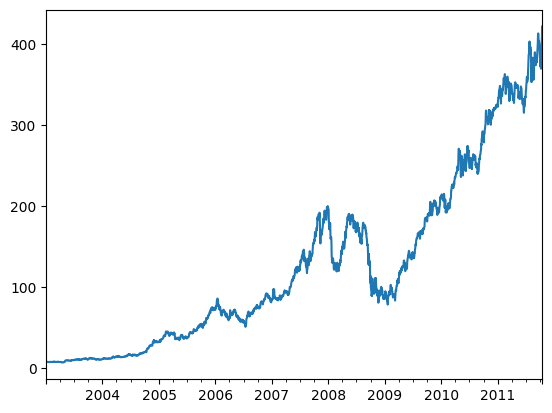

In [583]:
close_px.AAPL.plot()

<Axes: >

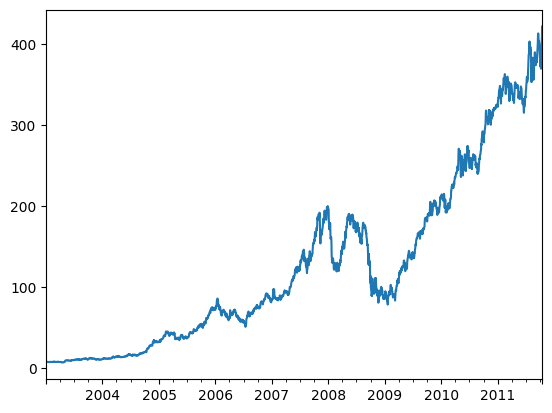

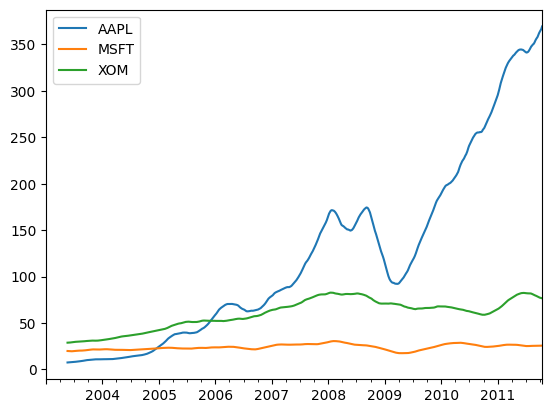

In [602]:
close_px.AAPL.plot()
close_px.rolling(100).mean().plot()

In [592]:
appl_std250 = close_px.AAPL.rolling(250,10).std()

<Axes: >

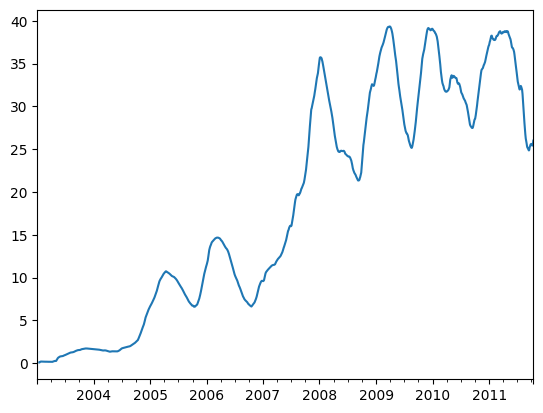

In [594]:
appl_std250.plot()

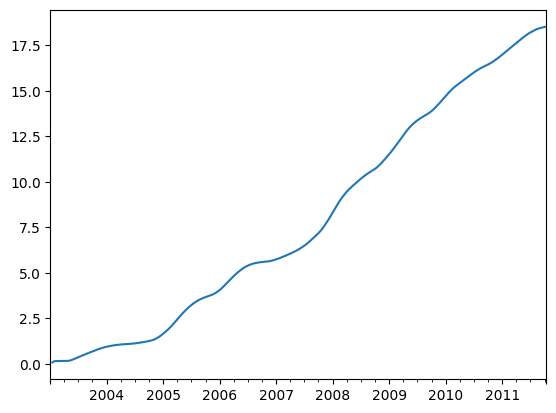

In [597]:
expanding_mean = appl_std250.expanding().mean().plot()

<Axes: >

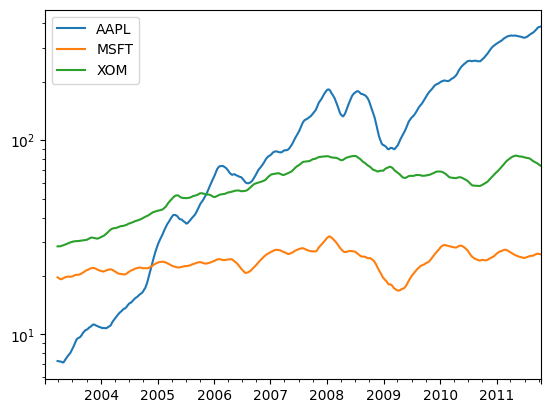

In [596]:
close_px.rolling(60).mean().plot(logy=True)
close_px.rolling(60)

<Axes: >

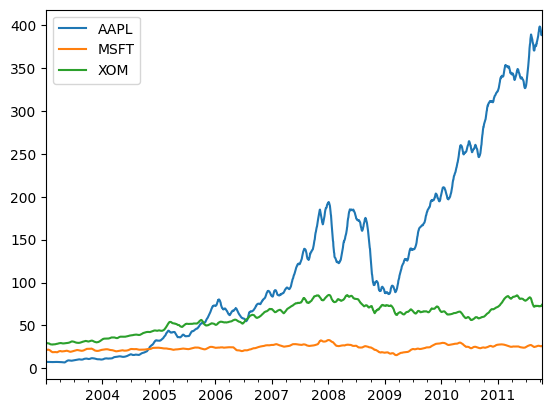

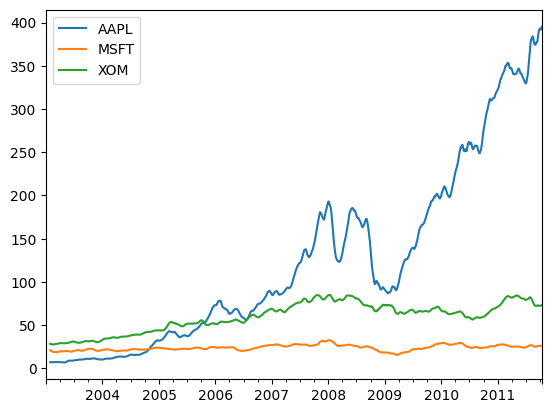

In [606]:
close_px.rolling('20D').mean().plot()
close_px.rolling(20).mean().plot()

<Axes: >

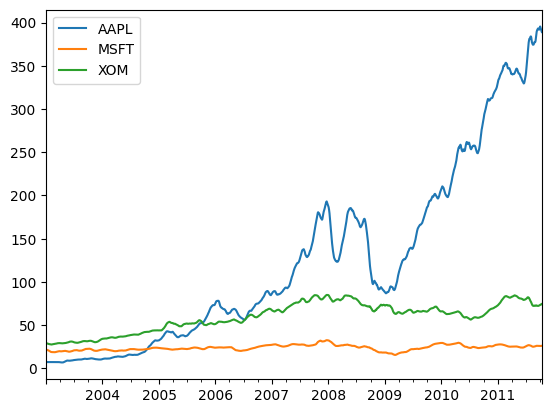

In [618]:
close_px.rolling(20,min_periods=10,center=True,on=close_px.index,method='single').mean().plot()

In [619]:
aapl_px = close_px.AAPL['2006':'2007']

In [620]:
ma60 = aapl_px.rolling(30,min_periods=20).mean()

In [637]:
ewma60 = aapl_px.ewm(span=2,).mean()

In [624]:
import matplotlib.pylab as plt

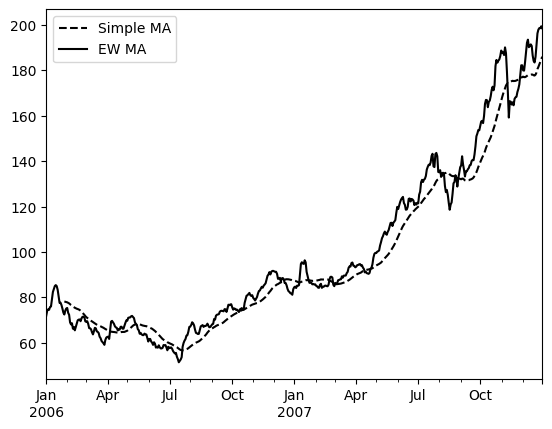

In [638]:
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k-',label='EW MA')
plt.legend()

In [639]:
spx_px = close_px_all['SPX']

In [640]:
spx_rets = spx_px.pct_change()

In [641]:
returns = close_px.pct_change()

In [642]:
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

<Axes: >

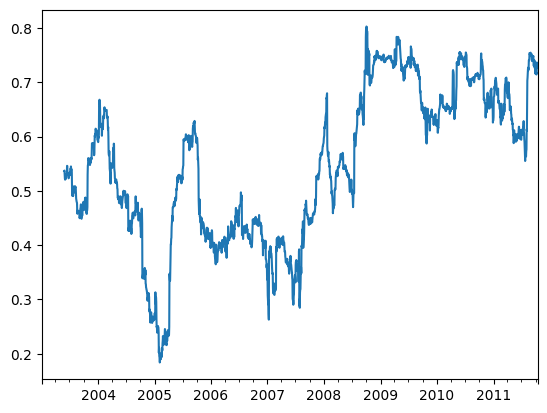

In [643]:
corr.plot()

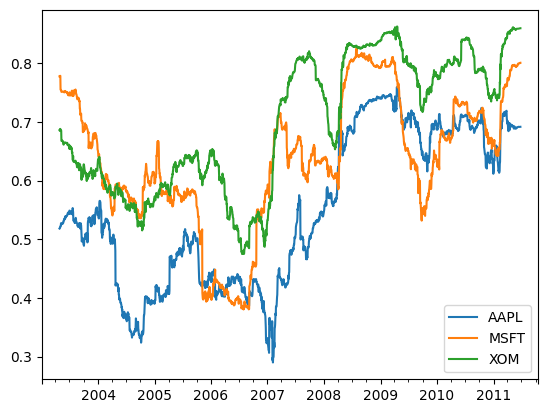

In [648]:
corr = returns.rolling(250,200,center=True).corr(spx_rets).plot()

In [649]:
from scipy.stats import percentileofscore

In [650]:
score_at_2percent = lambda x: percentileofscore(x,0.02)

In [651]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

<Axes: >

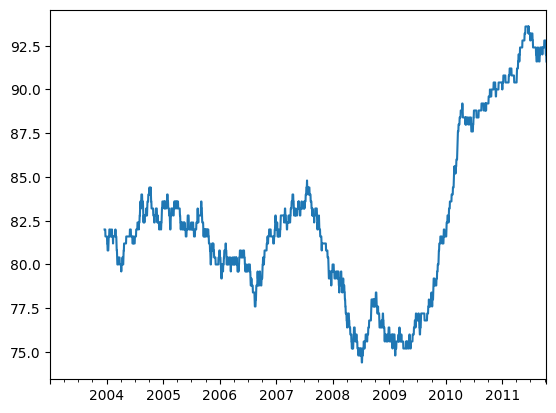

In [652]:
result.plot()